In [46]:
import numpy as np

def sigmoid(t):
    return np.exp(t)/(1+np.exp(t))



x_true = np.array([19, 23, 15])
N = len(x_true)
beta = 0.05

R = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if i > j:
            delta = x_true[i] - x_true[j]
            p = sigmoid(beta*delta)
            r = np.random.choice([0,1],p=[1-p, p])
            R[i,j] = r
            R[j, i] = 1-r
                        
print(R)






[[ 0.  0.  1.]
 [ 1.  0.  1.]
 [ 0.  0.  0.]]


Plot the histograms x_samp for each player apart from player 0

In [47]:
EPOCH = 1000
x = np.array([19, 89, 27])

hgrams = [[],[]]

for epoch in range(EPOCH):
    for j in range(1,N):
        x1 = np.arange(0, 100)
        LL = np.zeros((len(x1)))

        for i in range(N):
            if i != j:
                delta = x1 - x[i]
                lp = np.log(sigmoid(delta*beta))
                lp0 = np.log(1-sigmoid(delta*beta))
                LL += R[j,i]*lp + R[i,j]*lp0

        pp = np.exp(LL - np.max(LL))
        pp = pp/np.sum(pp)
        x_samp = np.random.choice(range(0,100),p=pp)
        x[j] = x_samp
        
        
#        if j==2:
#            print(x_samp)]
        if j > 0:
            hgrams[j-1].append(x_samp)

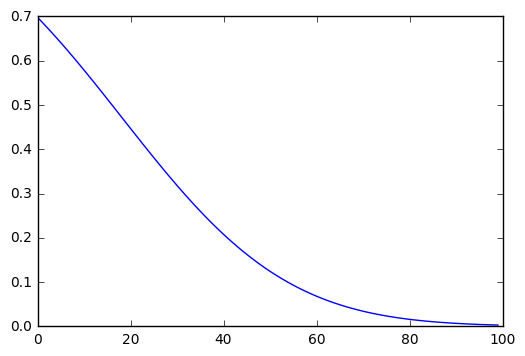

In [48]:
%matplotlib inline
import matplotlib.pylab as plt

plt.plot(np.exp(LL))
plt.show()

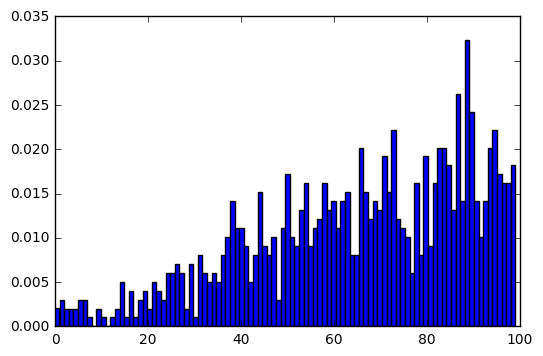

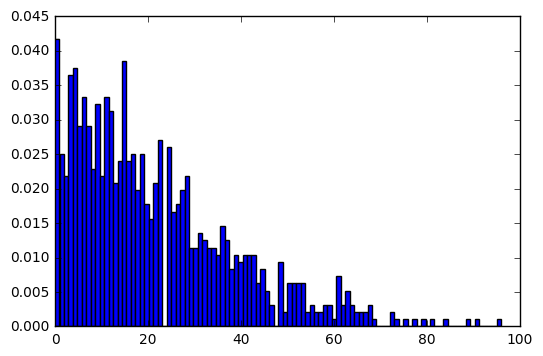

In [49]:
for arr in hgrams:
    plt.hist(arr, 100, normed=1)
    plt.show()
